# TP Nº 1: Análisis Exploratorio de Datos

## Reservas de Hotel

El [Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) seleccionado contiene información acerca de reservas realizadas a un hotel. Las dimensiones son: 36275 filas y 19 columnas. 

El objetivo es predecir quién es más probable que cancele una reserva. Por lo tanto la variable target es **'booking_status'**, la cuál indica el estado de la reserva (cancelado / no cancelado). 


## 1) Listado de variables y selección

| **Variable**                         | **Descripción**                                                                                               | **Entrada** | **Salida** | **Observaciones**                                               |
|-------------------------------------- |--------------------------------------------------------------------------------------------------------------- |------------- |------------ |----------------------------------------------------------------- |
| booking_id                           | Identificador único de cada reserva.                                                                           | X           |             | Esta variable será descartada porque puede generar overfitting. |
| no_of_adults                         | Número de adultos por reserva.                                                                                 | X           |             |                                                                 |
| no_of_children                       | Número de niños por reserva.                                                                                   | X           |             |                                                                 |
| no_of_weekend_nights                 | Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó.                     | X           |             |                                                                 |
| no_of_week_nights                     | Número de noches (lunes a viernes) que el huésped se hospedó o reservo.                                       | X           |             |                                                                 |
| type_of_meal_plan                     | Tipo de plan de comidas reservados por el cliente.                                                             | X           |             |                                                                 |
| required_car_parking_space           | Variable booleana que indica si el cliente requiere estacionamiento o no.                                     | X           |             | 0 = No, 1 = Sí                                                   |
| room_type_reserved                   | Tipo de habitación reservada por el cliente.                                                                   | X           |             |                                                                 |
| lead_time                             | Número de días entre la fecha de reserva y fecha de llegada.                                                   | X           |             |                                                                 |
| arrival_date                         | Día de llegada del cliente.                                                                                 | X           |             |                                                                 |
| arrival_month                         | Mes de la fecha de llegada del cliente.                                                                       | X           |             |                                                                 |
| arrival_year                         | Año de la fecha de llegada del cliente.                                                                       | X           |             |                                                                 |
| market_segment_type                   | Designación del segmento de mercado.                                                                           | X           |             |                                                                 |
| repeated_guest                       | Variable booleana que indica si el cliente es un huésped repetido o no.                                       | X           |             | 0 = No, 1 = Sí                                                   |
| no_of_previous_cancellations         | Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.                 | X           |             |                                                                 |
| no_of_previous_bookings_not_canceled | Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.                         | X           |             |                                                                 |
| avg_price_per_room                   | Precio (en Euros) medio por día de la reserva.                                                                 | X           |             |                                                                 |
| no_of_special_requests               | Número total de solicitudes especiales (vista desde la habitación, piso alto, etc) realizadas por el cliente. | X           |             |                                                                 |
| booking_status                       | Variable booleana que indica si la reserva fue cancelada o no.                                                 |             | X           | 0 = No, 1 = Sí                                                   |



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import keras
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas
import warnings

warnings.filterwarnings('ignore')


In [16]:
data = pd.read_csv('Hotel Reservations.csv')

In [17]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [18]:
#TIpo de datos de cada columna
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [19]:
#Dimensiones del dataset
data.shape

(36275, 19)

In [20]:
#Dimensiones del dataset sin duplicados
data.drop_duplicates().shape

(36275, 19)

In [21]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

## 2) Análisis detallado de un conjunto de variables

### a. Balanceo de la variable de salida (booking_status)

In [22]:
import plotly.express as px

vals = data.booking_status.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names)
fig.show()

Se puede observar en el gráfico de torta que existe un desbalance, entre los valores de la variable de salida 'booking_status'. El 67% de los clientes decide no cancelar la reserva (booking_status = 'Not_Canceled'), mientras que el 33% decide cancelarla (booking_status = 'Canceled'). 

Este desbalance de la variable de salida trae consecuencias a la hora de entrenar y medir el rendimiento de los modelos. 
Si el modelo se entrena con un conjunto de datos desbalanceado, puede tener un sesgo hacia la clase mayoritaria, en este caso, el modelo podría predecir correctamente las reservas que no se cancelaron, pero no estaría prediciendo correctamente las reservas que si se cancelaron. 
Además si se utiliza una métrica de evaluación que no tiene en cuenta el desbalanceo de la variable de salida, puede generar un análisis erróneo. Por ejemplo, si se utiliza la métrica Precision, el modelo puede predecir con alta precisión la clase mayoritaria, pero no predice correctamente la clase minoritaria, lo cuál generaría una evaluación engañosa en el rendimiento del modelo. 




### b. Comportamiento de las variables de entrada y su relación con la variable de salida

#### Variable: lead_time

En principio analizamos la distribución de los datos. Como se puede observar en el histograma, la mayor cantidad de reservas se realizaron con un tiempo de anticipación entre 0 y 49 días. Esto es importante a tener en cuenta, ya que al comparar esta variable con la variable de salida, puede predecir con error al dejarse influenciar por esta gran cantidad. 

In [23]:
px.histogram(data, x='lead_time', title='Distribución de la variable', nbins=15)

In [24]:
fig = px.histogram(data, x='lead_time',color='booking_status', barmode='group', nbins=30)
fig.show()

pd.crosstab(data['lead_time'], data['booking_status'], normalize = 'index')

booking_status  Canceled  Not_Canceled
lead_time                             
0               0.052429      0.947571
1               0.102041      0.897959
2               0.059098      0.940902
3               0.090476      0.909524
4               0.098726      0.901274
...                  ...           ...
381             1.000000      0.000000
386             0.913043      0.086957
418             1.000000      0.000000
433             1.000000      0.000000
443             1.000000      0.000000

[352 rows x 2 columns]

A partir del histograma y la tabla cruzada entre el estado de la reserva (booking_status) y el tiempo anticipado de reservación (lead_time), podemos observar que para valores altos en la variable lead_time, el valor de booking_status tiende a 1. Mientras que si el valor de la variable lead_time es cada vez más chico, el valor de booking_status tiende a 0. 
Por lo tanto, podemos concluir que los clientes que reservan con mayor anticipación, son más propensos a cancelar su reserva, mientras que aquellos que reservan con menos anticipación, son menos propensos de cancelar dicha reserva. 

#### Variable: no_of_adults

Analizamos la distribución de los datos y podemos concluir que la mayoría de las reservas son realizadas por 2 adultos. Las reservas realizadas por 0 y 4 adultos podrían ser outliers, ya que no pertenecen a la distribución normal de los datos.

In [25]:
vals = data.no_of_adults.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names, title='Distribución de "no_of_adults"')
fig.show()

In [26]:
fig = px.histogram(data, x='no_of_adults',color='booking_status', barmode='group', nbins=5)
fig.show()

pd.crosstab(data['no_of_adults'], data['booking_status'], normalize = 'index')

booking_status  Canceled  Not_Canceled
no_of_adults                          
0               0.316547      0.683453
1               0.241196      0.758804
2               0.349280      0.650720
3               0.372464      0.627536
4               0.187500      0.812500

A partir del gráfico anterior y la tabla cruzada, podemos concluir que no existe una relación tan significativa entre la variable de entrada (no_of_adults) y la variable de salida. Si varía el valor de la cantidad de adultos que hay en cada reserva, el valor de la variable de salida sigue manteniendo una tendencia de no cancelarla ("Not_Canceled"). La diferencia más significativa es de aproximadamente 10% cuando la reserva es para un adulto, comparada con 2 o 3 adultos. 

#### Variable: no_of_special_requests

Analizamos la distribución de los datos y podemos concluir que el 54% de las reservas no tienen una solicitud especial por parte del cliente, mientras que el resto de las reservas tienen una o más solicitudes especiales. 

In [27]:
vals = data.no_of_special_requests.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names, title='Distribución de "no_of_special_requests"')
fig.show()

In [28]:
fig = px.histogram(data, x='no_of_special_requests',color='booking_status', barmode='group')
fig.show()

pd.crosstab(data['no_of_special_requests'], data['booking_status'], normalize = 'index')

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
0                       0.432068      0.567932
1                       0.237668      0.762332
2                       0.145967      0.854033
3                       0.000000      1.000000
4                       0.000000      1.000000
5                       0.000000      1.000000

A partir del histograma y la tabla cruzada entre la variable de entrada (no_of_special_requests) y la variable de salida, podemos concluir que aquellos clientes que realizaron una o más solicitudes especiales, son más probable que no cancelen su reserva. Por ejemplo, el 76% de las personas que realizaron una sola solicitud especial, no cancelaron su reserva, el 85% de las personas que realizaron 2 solicitudes especiales, tampoco cancelaron su reserva. Esto indica que mayor sean las solicitudes realizadas por el cliente, menos probabilidad de cancelar la reserva.

#### Variable: market_segment_type

Analizamos la distribución de los datos y podemos concluir que el 64% de las reservas son online, el 29% son offline y lo restante corresponde a otros segmentos. 

In [29]:
vals = data.market_segment_type.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names, title='Distribución de "market_segment_type"')
fig.show()

In [30]:
fig = px.histogram(data, x='market_segment_type',color='booking_status', barmode='group')
fig.show()

pd.crosstab(data['market_segment_type'], data['booking_status'], normalize = 'index')

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation             0.296000      0.704000
Complementary        0.000000      1.000000
Corporate            0.109073      0.890927
Offline              0.299487      0.700513
Online               0.365081      0.634919


Analizando los gráficos concluimos que el 93% de las reservas se hacen de forma Online y Offline. Estos tipos de reservas son las que mayor porcentaje de cancelación tienen, el 30% de las reservas Offline son canceladas y el 36,5% de las Online son canceladas.
El tercer segmento de mercado con más reservas es el Corporativo, donde los porcentajes de cancelación son del 10,9%.
Del mercado Complementary podemos observar que no se encuentran reservas canceladas y que representan al 1,08% de las reservas totales.
Por el lado del mercado Aviation, las reservar representan al 0,34% del total y el 29,6% de estas son canceladas.

#### Variable: room_type_reserved

In [31]:
vals = data.room_type_reserved.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names, title='Distribución de "room_type_reserved"')
fig.show()

In [32]:
fig = px.histogram(data, x='room_type_reserved',color='booking_status', barmode='group', nbins=30)
fig.show()

pd.crosstab(data['room_type_reserved'], data['booking_status'], normalize = 'index')

booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1         0.322503      0.677497
Room_Type 2         0.329480      0.670520
Room_Type 3         0.285714      0.714286
Room_Type 4         0.341588      0.658412
Room_Type 5         0.271698      0.728302
Room_Type 6         0.420290      0.579710
Room_Type 7         0.227848      0.772152

En los gráficos podemos observar que la mayoría de las reservas pertenecen a las habitaciones del tipo 1 y 4. En estos tipos de habitaciones los porcentajes de cancelación son muy similares, por lo tanto, podemos decir que esta variable de entrada no representa un gran relación con la variable de salida.
Los tipos de habitaciones que donde más difieren estos porcentajes son en las habitaciones del tipo 6 y 7. En las reservas de las habitaciones del tipo 6 que representan al 2,66% del total, se cancelaron el 42%. Y de las reservas de habitaciones del tipo 7 que representan al 0,02% del total se cancelaron el 22,7%. 

### c. Transformaciones para las variables de entrada

**Variables: type_of_meal_plan, room_type_reserved, market_segment_type**

Para estas tres variables de entrada se debería aplicar el método **OneHotEncoder**.
Porque son variables de entradas categóricas. Esto nos permitirá transformar éstas variables en numéricas, generando nuevas columnas para cada valor de categoría de cada variable. 


### d. Valores Nulos y/o Extermos

##### 1. Valores nulos:

En nuestro dataset no se encuentran valores nulos, por lo tanto no aplicamos ningún tratamiento.

In [33]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

##### 2. Outliers: 

#### Variable: lead_time

In [34]:
fig = px.box(data, y='lead_time')
fig.show()

A través de un diagrama de caja, podemos ver que la variable 'lead_time' tiene valores atípicos (outliers) que están entre 300 y 450. 
En este caso, los valores entre 300 y 450 podrían eliminarse. Esto quiere decir, que si la diferencia de días entre la fecha de reserva y la fecha de llegada es mayor a 300, podrían descartarse estos valores ya que no pertenecen a la distribución normal de los datos. 

#### Variable: avg_price_per_room

In [35]:
fig = px.box(data, y='avg_price_per_room')
fig.show()

In [36]:
px.histogram(data, x='avg_price_per_room', title='Distribución de la variable', nbins=15)

Si bien no incluímos a la variable 'avg_price_per_room' en el análisis anterior, nos pareció importante analizar si tenía outliers o no. Como se puede observar en el diagrama de caja y en el histograma, posee valores atípicos que se concentran entre 200 y 400 aproximadamente. También hay un valor atípico máximo de 540. 
En este caso, para los precios de las habitaciones que superen el valor de 225, podrían eliminarse ya que son valores atípicos que no se encuentran dentro del rango normal de precios.

### e. Variables altamente correlacionadas linealmente


<Axes: >

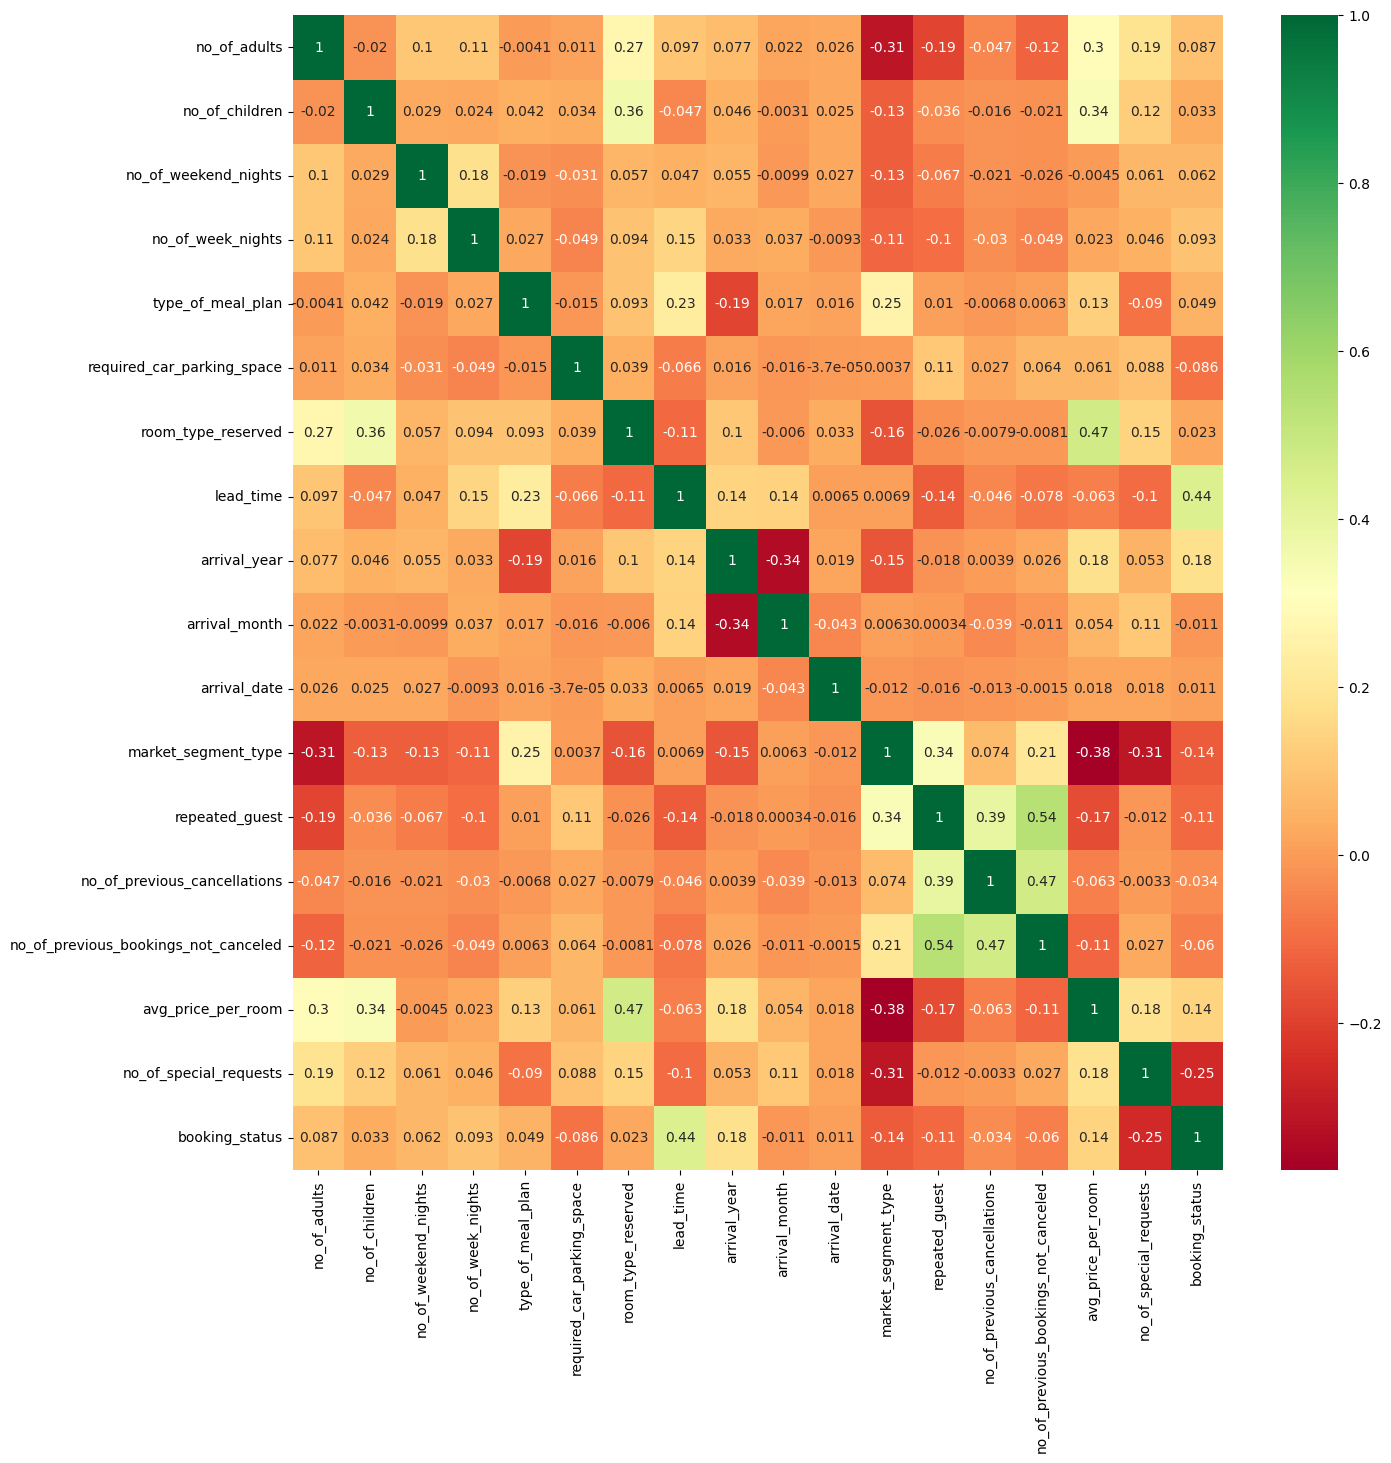

In [37]:
#Transformamos todas las variables a numéricas para poder graficar un mapa de calor
data_copy = data.copy(deep=True)
data_copy = data_copy[["no_of_adults","no_of_children","no_of_weekend_nights", "no_of_week_nights", "type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "lead_time","arrival_year", "arrival_month", "arrival_date", "market_segment_type", "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "booking_status"]]
data_copy["type_of_meal_plan"] = data_copy.type_of_meal_plan.replace(['Not Selected','Meal Plan 1','Meal Plan 2','Meal Plan 3'],[0,1,2,3])
data_copy["room_type_reserved"] = data_copy.room_type_reserved.replace(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7'],[1,2,3,4,5,6,7])
data_copy["market_segment_type"] = data_copy.market_segment_type.replace(['Online','Offline','Corporate','Complementary','Aviation'],[1,2,3,4,5])
data_copy["booking_status"] = data_copy.booking_status.replace(['Canceled','Not_Canceled'],[1,0])

data_copy.corr()

plt.figure(figsize = (15,15))
sns.heatmap(data_copy.corr(), annot=True, cmap='RdYlGn')

En primer lugar transformamos las variables categóricas a numéricas siguiendo el método de OneHotEncoder. 

Como se puede observar en el mapa de calor, la variable **'lead_time'** tiene una correlación positiva leve de 0.44 con la variable target booking_status, esto indica que al aumentar el valor de la variable 'lead_time', también aumenta el valor de la variable target. Esto nos indica que los clientes que reservan con mayor anticipación (mayor lead_time), son más propensos a cancelar su reserva (valores de 'booking_status' cercanos a 1). 

Por otro lado, también observamos que existe una correlación negativa fuerte entre la variable **'no_of_special_requests'** y la variable target booking_status, esto quiere decir que al aumentar el número de solicitudes especiales, el cliente tiene menos probabilidad de cancelar su reserva (valores de 'booking_status' cercanos a 0). 


### f. Listado de posibles dudas/preguntas al encargado de proveer los datos

1. ¿Cómo se define un tipo de habitación (room_type_reserved)? Brindar mayor detalles acerca de las diferencias entre los tipos de habitaciones, además del precio promedio de cada una. 
2. Dentro de los diferentes segmentos del mercado (market_segment_type), cuando el valor es 'Aviation', esto significa que, ¿la persona que realiza la reserva trabaja en un aeropuerto?. 
3. Mayor información sobre los diferentes planes de comida, ¿cómo se define cada uno?. 
4. Brindar más información acerca de los requisitos especiales que solicita cada cliente (no_of_special_requests), ya que pudimos comprobar que tiene una correlación con la variable de salida que intentamos predecir (booking_status). 

## 3) Hipótesis sobre los datos

### a. Formulación de hipótesis sobre la variable target bajo determinadas condiciones

#### Hipótesis 1: los huéspedes que se han hospedado anteriormente tienen menos probabilidad de cancelar la reserva. 

#### Hipótesis 2: los huéspedes que se no se han hospedado anteriormente tienen más probabilidad de cancelar la reserva.

### b. Comprobación de las hipótesis

#### Hipótesis 1: 

In [38]:
ds_huespedes_ant = data[(data['repeated_guest']==1)].booking_status.value_counts()
names=ds_huespedes_ant.index
fig = px.pie(values=ds_huespedes_ant, names=names, title='Porcentaje de cancelación/no cancelación de huéspedes repetidos')
fig.show()

Para verificar la hipótesis, se realizó un gráfico de torta que muestra para los clientes que ya hospedaron anteriormente, la cantidad que cancelaron o no la reserva. 
Podemos observar que el 98% de los clientes que ya se hospedaron alguna vez, no cancelan su reserva. Solamente un 2% decide cancelarla. Por lo tanto, podemos llegar a la conclusión de que la hipótesis planteada es **verdadera**. 

#### Hipótesis 2:

In [39]:
ds_huespedes_ant = data[(data['repeated_guest']==0)].booking_status.value_counts()
names=ds_huespedes_ant.index
fig = px.pie(values=ds_huespedes_ant, names=names, title='Porcentaje de cancelación/no cancelación de clientes que nunca se hospedaron anteriormente')
fig.show()

Para verificar la hipótesis, se realizó un gráfico de torta que muestra para los clientes que no se han hospedado anteriormente, la cantidad que cancelaron o no la reserva. 
Podemos observar que el 66% de los clientes que no se han hospedado alguna vez, no cancelan su reserva. Mientras que un 33% decide no cancelarla. Por lo tanto, podemos llegar a la conclusión de que la hipótesis planteada es **falsa**. 

### c. Hallazgo encontrado en los datos

In [40]:
fig = px.histogram(data, x='market_segment_type',color='arrival_year', barmode='group')
fig.show()

In [41]:
ds_market_2017 = data[(data['arrival_year']==2017)].market_segment_type.value_counts()
names=ds_market_2017.index
fig = px.pie(values=ds_market_2017, names=names, title='Tipos de mercado de reservas en 2017')
fig.show()

In [42]:
ds_market_2018 = data[(data['arrival_year']==2018)].market_segment_type.value_counts()
names=ds_market_2018.index
fig = px.pie(values=ds_market_2018, names=names, title='Tipos de mercado de reservas en 2018')
fig.show()

Se puede observar que en el año 2018, la cantidad de reservas 'offline' disminuyeron y la cantidad de reservas 'online' aumentaron a comparación del año 2017. Estos puede significar que a medida que avanza el tiempo, las personas prefieren reservar hoteles en línea. 